In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sayantikalaskar","key":"9c46cbc3dc0f3d53e9eef348359a288e"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d shivamb/fashion-clothing-products-catalog

Dataset URL: https://www.kaggle.com/datasets/shivamb/fashion-clothing-products-catalog
License(s): CC0-1.0
100% 615k/615k [00:00<00:00, 1.86MB/s]
100% 615k/615k [00:00<00:00, 1.86MB/s]


In [6]:
!unzip fashion-clothing-products-catalog.zip

Archive:  fashion-clothing-products-catalog.zip
  inflating: myntra_products_catalog.csv  


In [7]:
# Load the dataset
retail = pd.read_csv('/content/myntra_products_catalog.csv')
retail.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [8]:
# Display dataset shape
retail.shape

(12491, 8)

In [9]:
#Display dataset info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [10]:
# Display dataset description
retail.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [11]:
# Calculate the percentage of missing values
retail_null = round(100*(retail.isnull().sum())/len(retail), 2)
retail_null

ProductID       0.00
ProductName     0.00
ProductBrand    0.00
Gender          0.00
Price (INR)     0.00
NumImages       0.00
Description     0.00
PrimaryColor    7.16
dtype: float64

In [12]:
# Check for duplicates
retail.duplicated().sum()

0

2. Data Cleaning¶
- Handle missing values.
- Correct data types if necessary.
- Remove duplicates.

In [13]:
# Drop rows with missing values
retail = retail.dropna()
retail.shape

(11597, 8)

In [14]:
# Ensure data types are correct
retail['ProductID'] = retail['ProductID'].astype('string')
retail['ProductName'] = retail['ProductName'].astype('string')
retail['ProductBrand'] = retail['ProductBrand'].astype('string')
retail['Gender'] = retail['Gender'].astype('category')
retail['Price (INR)'] = retail['Price (INR)'].astype('float64')
retail['NumImages'] = retail['NumImages'].astype('int64')
retail['Description'] = retail['Description'].astype('string')
retail['PrimaryColor'] = retail['PrimaryColor'].astype('category')
retail.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745.0,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810.0,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899.0,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599.0,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759.0,5,"Brown and off-white printed casual shirt, has ...",White


In [15]:
# Remove spaces from string columns
string_columns = ['ProductID', 'ProductName', 'ProductBrand', 'Description', 'PrimaryColor']
for col in string_columns:
    retail[col] = retail[col].str.strip()

In [16]:
#Display cleaned dataset info
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11597 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ProductID     11597 non-null  string  
 1   ProductName   11597 non-null  string  
 2   ProductBrand  11597 non-null  string  
 3   Gender        11597 non-null  category
 4   Price (INR)   11597 non-null  float64 
 5   NumImages     11597 non-null  int64   
 6   Description   11597 non-null  string  
 7   PrimaryColor  11597 non-null  object  
dtypes: category(1), float64(1), int64(1), object(1), string(4)
memory usage: 736.4+ KB


In [17]:
#Display cleaned dataset description
retail.describe()

,Price (INR),NumImages
count,11597.000000,11597.000000
mean,1460.912995,4.967319
std,2159.003043,1.063547
min,153.000000,1.000000
25%,649.000000,5.000000
50%,939.000000,5.000000
75%,1499.000000,5.000000
max,63090.000000,10.000000


EDA

Gender-Specific Preferences:


In [18]:
# Unique value counts for gender
gender_counts = retail['Gender'].value_counts().sort_values(ascending=False)
gender_counts

Gender
Women          4732
Men            4343
Unisex         1056
Boys           1032
Girls           388
Unisex Kids      46
Name: count, dtype: int64

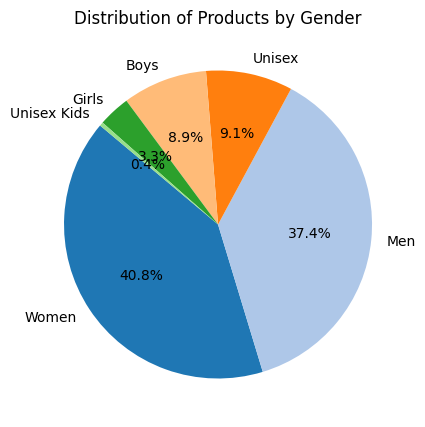

In [19]:
# Prepare data for pie chart
labels = gender_counts.index
sizes = gender_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = plt.cm.tab20(range(len(labels))))
plt.title('Distribution of Products by Gender')

# Display plot
plt.show()

In [20]:
# Calculate the average price for each gender
average_price_by_gender = retail.groupby('Gender', observed = False)['Price (INR)'].mean()
average_price_by_gender

Gender
Boys            817.713178
Girls           909.162371
Men            1587.423440
Unisex         2294.987689
Unisex Kids    1082.717391
Women          1347.861581
Name: Price (INR), dtype: float64

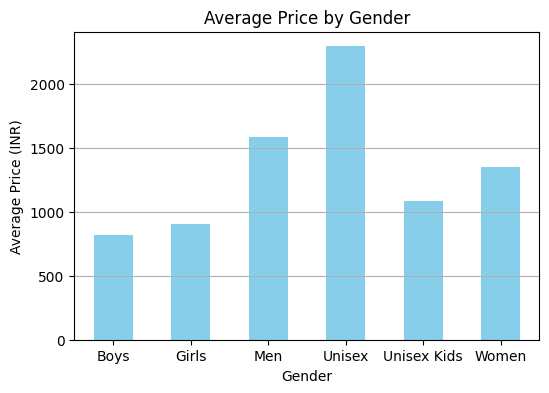

In [21]:
# Plotting the histogram
plt.figure(figsize=(6, 4))
#colors = plt.cm.tab20b(np.linspace(0, 1, len(average_price_by_gender)))
average_price_by_gender.plot(kind='bar', color='skyblue')
plt.title('Average Price by Gender')
plt.ylabel('Average Price (INR)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

Color Distribution Analysis:

In [22]:
color_mapping = {
    'Blue': '#0041c2',
    'Black': '#20292f',
    'Red': '#d0312d',
    'Green': 'green',
    'White': '#f2f3f4',
    'Grey': 'grey',
    'Brown': 'saddlebrown',
    'Yellow': '#FFFF00',
    'Pink': 'hotpink',
    'Beige': 'moccasin',
    'Gold': '#eebc51',
    'Maroon': 'maroon',
    'Orange': '#FF7F0E',
    'Silver': '#c0c0c0',
    'Purple': 'purple',
    'Burgundy': '#660033',
    'Khaki': '#c3b091',
    'Navy': 'navy',
    'Lavender': '#dfc5fe',
    'Matte': '#854B4A',  # Assuming similar colors for such shades
    'Mustard': '#e1ad01',
    'Magenta': '#ec00bc',
    'Charcoal': '#36454f',
    'Rose': 'pink',
    'Platinum': '#e5e4de',
    'Bronze': '#c76d40',
    'Peach': '#f4a384',
}
# Count occurrences of each primary color
color_counts = retail['PrimaryColor'].value_counts()

# Prepare colors in the specified order to be used for plotting
colors = [color_mapping[color] for color in color_counts.index]

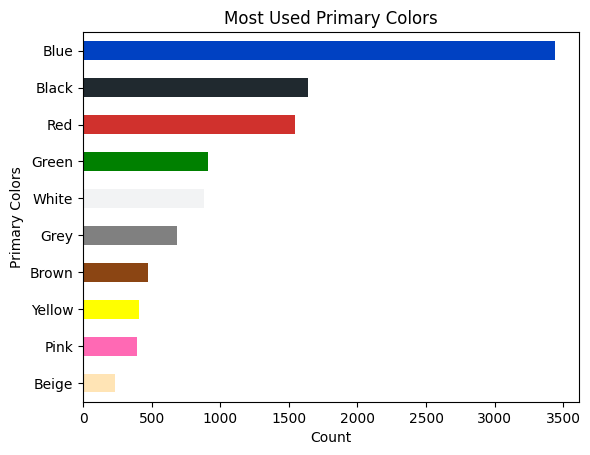

In [23]:
# Plot the bar chart using the mapped colors
color_counts.head(10).plot(kind='barh', color=colors)
plt.title('Most Used Primary Colors')
plt.xlabel('Count')
plt.ylabel('Primary Colors')
plt.gca().invert_yaxis()
plt.gca().set_facecolor('white')
plt.show()

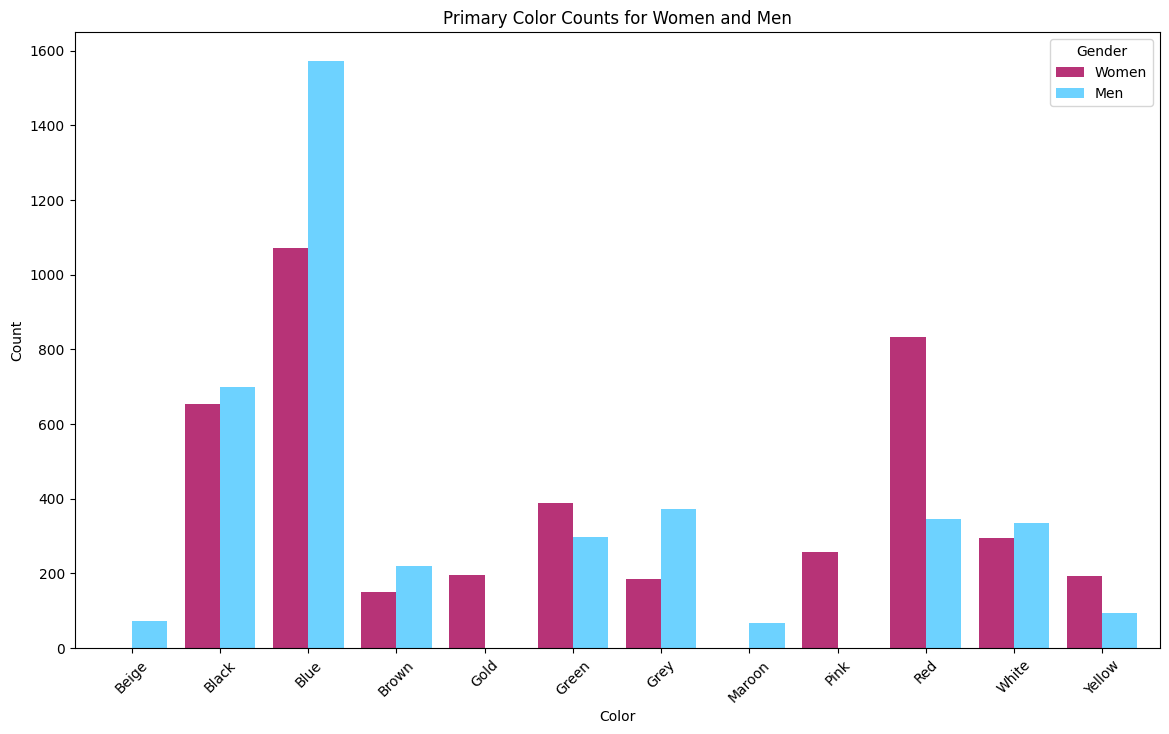

In [24]:
# Filter the dataset for "Women" and "Men"
women_retail = retail[retail['Gender'] == 'Women']
men_retail = retail[retail['Gender'] == 'Men']

# Count occurrences of each primary color for "Women"
women_color_counts = women_retail['PrimaryColor'].value_counts().head(10)

# Count occurrences of each primary color for "Men"
men_color_counts = men_retail['PrimaryColor'].value_counts().head(10)

# Combine the color counts into a single DataFrame
color_counts_df = pd.DataFrame({
    'Women': women_color_counts,
    'Men': men_color_counts
}).fillna(0)  # Fill NaN values with 0 for colors not present in both genders

# Plot the grouped bar graph
color_counts_df.plot(kind='bar', figsize=(14, 8), color=['#B73377', '#6DD2FF'], width=0.8)
plt.title('Primary Color Counts for Women and Men')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

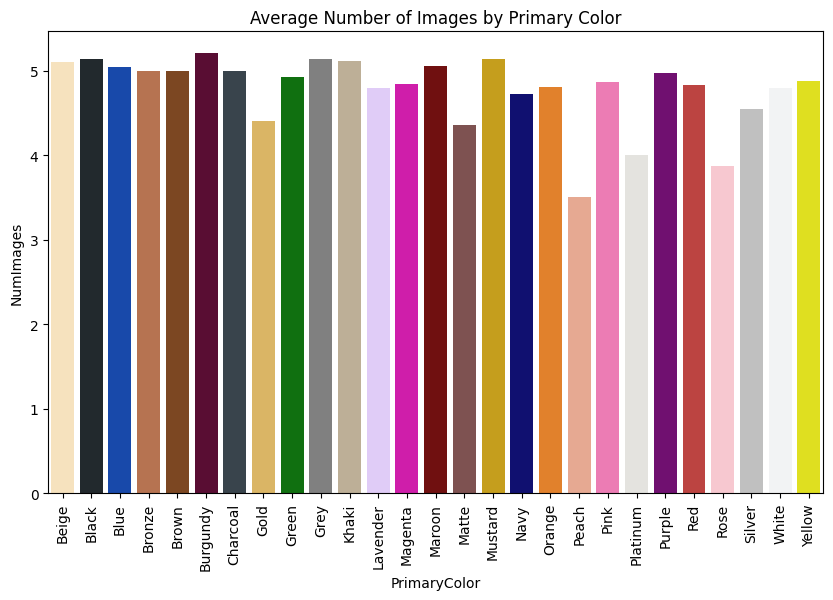

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='PrimaryColor', y='NumImages', hue='PrimaryColor', data=color_image_counts, palette=color_image_counts.set_index('PrimaryColor')['Color'].to_dict(), dodge=False)
plt.xticks(rotation=90)
plt.title('Average Number of Images by Primary Color')
plt.legend().remove()  # Manually remove legend if needed
plt.show()

Price Distribution Analysis:

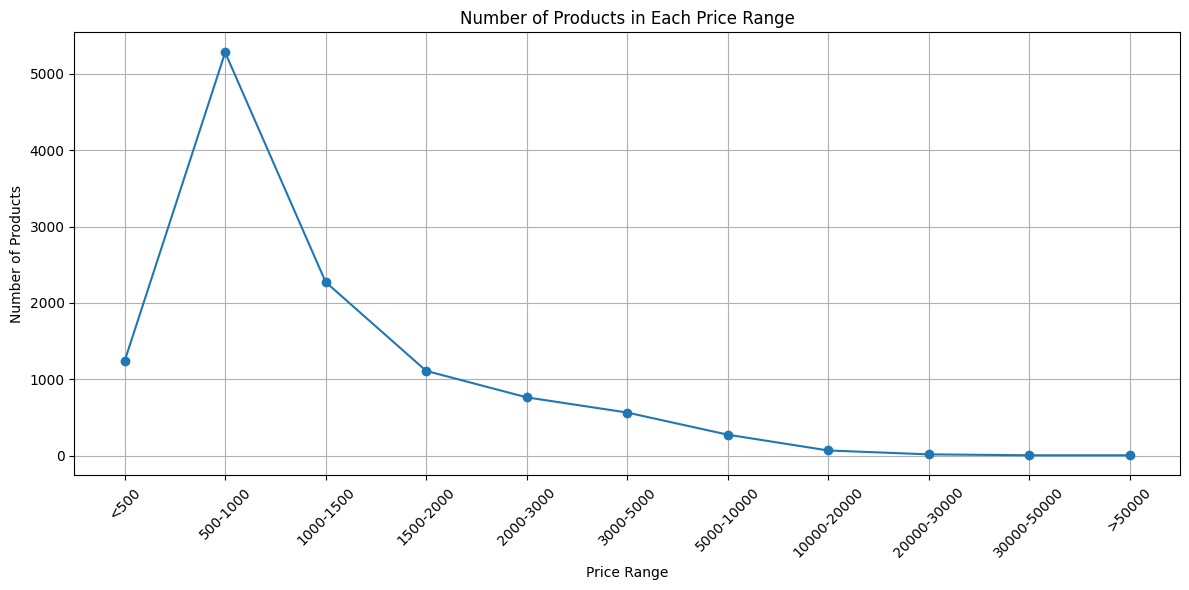

In [31]:
# Define price ranges for grouping
price_bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, 20000, 30000, 50000, float('inf')]
price_labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-3000', '3000-5000', '5000-10000',
                '10000-20000', '20000-30000', '30000-50000', '>50000']

# Bin the 'Price (INR)' data
retail['PriceRange'] = pd.cut(retail['Price (INR)'], bins=price_bins, labels=price_labels, right=False)

# Count the number of products in each price range
price_range_counts = retail['PriceRange'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
price_range_counts.plot(kind='line', marker='o')

plt.title('Number of Products in Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(range(len(price_labels)), price_labels, rotation=45)
plt.tight_layout()
plt.grid()

plt.show()

Brand Popularity Analysis:

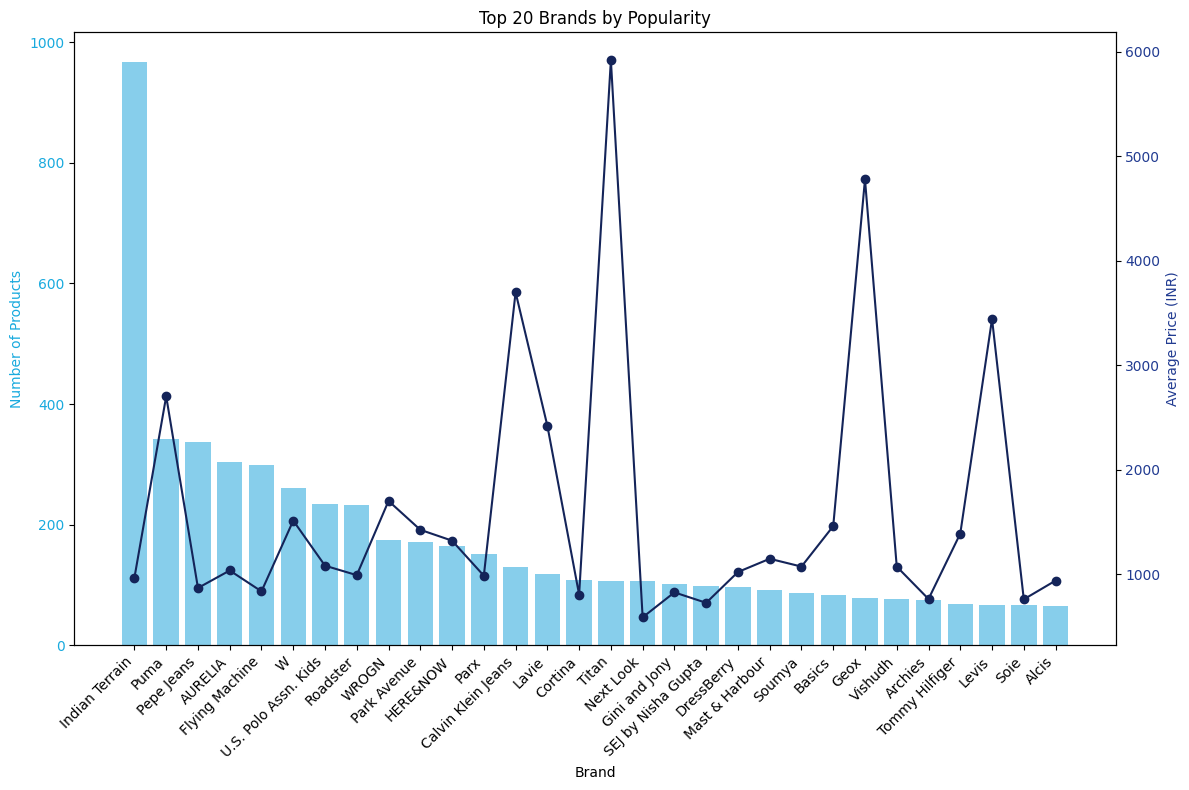

In [32]:
# Brand popularity analysis
top_brands = retail['ProductBrand'].value_counts().head(30).index
brand_counts = retail['ProductBrand'].value_counts().head(30)

# Calculate average price for each of the top 20 brands
avg_prices = retail[retail['ProductBrand'].isin(top_brands)].groupby('ProductBrand')['Price (INR)'].mean().reindex(top_brands)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar graph for number of products
color="skyblue"
ax1.set_xlabel('Brand')
ax1.set_ylabel('Number of Products', color='#19aade')
ax1.bar(brand_counts.index, brand_counts.values, color=color)
ax1.tick_params(axis='y', labelcolor='#19aade')
ax1.set_xticks(range(len(brand_counts.index)))
ax1.set_xticklabels(brand_counts.index, rotation=45, ha='right')

# Line graph for average price
ax2 = ax1.twinx()
color = '#142459'
ax2.set_ylabel('Average Price (INR)', color='#213B91')
ax2.plot(avg_prices.index, avg_prices.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor='#213B91')

# Title and layout
plt.title('Top 20 Brands by Popularity')
fig.tight_layout()

# Show the plot
plt.show()

4. Conclusion and Interpretation
1. Gender-Specific Insights:
- Dominance of Adult Clothing: The majority of the products are targeted towards adults, with Women and Men categories making up a significant portion (78%) of the dataset.
- The higher average price of Unisex products suggests that these items may be of higher quality, branded, or specialized items that cater to a broader audience.
- The lower price points for Boys and Girls products align with typical market trends where children's clothing is generally less expensive due to factors like smaller sizes and less complex designs.

Women’s Fashion:

- Top Colors: Blue, Red, and Black are the most common colors in women's fashion, suggesting that these colors are highly favored by female consumers.
Pink is significantly more prominent in women's fashion, with 258 products, indicating its popularity.
- Unique Preferences: Colors like Gold and Silver have higher representation in women's products, which could be linked to their appeal in accessories and formal wear.

Men’s Fashion:

- Top Colors: Blue, and Black dominate men's fashion, indicating these colors are staples in men's wardrobes.
- Distinct Preferences: Colors like Khaki and Charcoal are more commonly found in men's fashion, which could be attributed to their association with more neutral and earthy tones preferred by men.

2. Color Distribution:

Overall Color Distribution:

- Most Common Colors: Blue is the most dominant color across the dataset, reflecting a strong trend for this color in fashion products. Followed by Black and Red, suggesting these colors are also popular choices.
Other significant colors include Green, White, Grey, and Brown, each with substantial counts
- Less Common Colors: Colors like Mustard, Magenta, Charcoal, Rose, Platinum, and Peach, each with fewer than 20 products.
- Most Colors Have 5 Images: Many colors have an average image count close to 5, reflecting a consistent approach to product presentation across different colors.
- Popular colors like Blue, Black, and Red have both high product counts and significant visual representation.
- Rare colors like Burgundy, Charcoal, and Bronze, despite having fewer products, receive a high number of images per product, indicating a focused marketing effort.
- Peach, Rose, and Platinum have very few products and a lower average image count, indicating niche appeal and possibly less demand.

Comparison Between Genders:

- Shared Popular Colors: Both men and women favor Blue, Black, and Red, indicating these colors are universally popular.
- Gender-Specific Trends: Women have a higher preference for colors like Pink and Gold, while men prefer colors like Grey and Khaki.
- Color Variety: Women's fashion shows a broader variety of colors, including more vibrant and metallic shades such as, compared to men's fashion which leans towards more neutral and subdued colors.

3. Pricing Insights:

- Right-Skewed Distribution: The price distribution is right-skewed, indicating that most products are on the lower end of the price spectrum., with a few expensive outliers.
- Target Audience: Given that the bulk of the products are priced under INR 2000, the target audience is likely to be shoppers who are looking for affordable fashion options.
- High-End Products: The very small number of high-end products (above INR 20000) implies that the catalog does not focus significantly on luxury items.
Business Strategy: The retailer might be adopting a high-volume, low-margin strategy for most of their products, while also offering a few high-margin luxury items.
4. Brand Analysis:
- Dominant Brands: Indian Terrain stands out as the brand with the highest number of products (968). This indicates a strong presence and potentially high customer demand or broad product range.
- Premium vs. Budget Brands: Titan has the highest average price (5918.24 INR), positioning it as a premium brand in the dataset. Next Look has the lowest average price (587.77 INR), indicating it is more of a budget-friendly brand.
- Mid-Range Brands: Brands like Puma (2702.63 INR), Calvin Klein Jeans (3697.85 INR), and Lavie (2420.78 INR) fall into the higher mid-range category, suggesting they offer a balance between quality and affordability. Pepe Jeans (868.53 INR) and Flying Machine (836.09 INR) offer more budget-friendly options while still maintaining a notable presence.
- Niche and Specialized Brands: U.S. Polo Assn. Kids focuses on children's fashion, and its average price (1081.93 INR) suggests mid-range pricing for this segment. SEJ by Nisha Gupta and DressBerry also have a smaller product range but offer competitively priced items.

5. Overall Market Strategy:

- Myntra appears to adopt a high-volume, low-margin strategy for most of its products, with a selection of premium items to cater to a broader audience.
- The retailer’s ability to balance affordability and luxury highlights a well-rounded market strategy.

By leveraging these insights, Myntra can refine its product offerings, marketing campaigns, and pricing strategies to align more closely with evolving fashion trends and consumer preferences. This detailed analysis provides valuable information for optimizing business strategies and enhancing customer satisfaction in the ever-changing fashion retail landscape.